In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from matplotlib.animation import FuncAnimation

In [2]:
np.random.seed(42)

# y = sin(x) + random noise
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_1d = X.ravel()
y_1d = y.ravel()

In [3]:
class GradientBoostingVisualizer:
    def __init__(self, X, y, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.X = X
        self.y = y
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        
        # Initialize model with mean value
        self.initial_prediction = np.mean(y)
        self.current_prediction = np.full_like(y, self.initial_prediction)
        
        # List to store models
        self.models = []
        self.residuals_history = []
        self.prediction_history = [self.current_prediction.copy()]
        
    def fit(self):
        residuals = self.y - self.current_prediction
        self.residuals_history.append(residuals.copy())
        
        for i in range(self.n_estimators):
            # Fit a new model on residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(self.X.reshape(-1, 1), residuals)
            self.models.append(tree)
            
            # Update predictions and residuals
            predictions = tree.predict(self.X.reshape(-1, 1))
            self.current_prediction += self.learning_rate * predictions
            residuals = self.y - self.current_prediction
            
            # Store history for visualization
            self.prediction_history.append(self.current_prediction.copy())
            self.residuals_history.append(residuals.copy())
    
    def visualize(self):
        # Set up the figure
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))
        
        # Sort X and corresponding values for smooth plotting
        sort_idx = np.argsort(self.X)
        X_sorted = self.X[sort_idx]
        y_sorted = self.y[sort_idx]
        
        # Function to initialize the plots
        def init():
            axs[0].set_title('Model Fitting Progress')
            axs[0].set_xlabel('X')
            axs[0].set_ylabel('y')
            axs[0].scatter(self.X, self.y, color='black', alpha=0.5, label='Data Points')
            axs[0].axhline(y=self.initial_prediction, color='blue', linestyle='--', alpha=0.5, label='Initial Prediction (Mean)')
            
            axs[1].set_title('Residuals')
            axs[1].set_xlabel('X')
            axs[1].set_ylabel('Residual')
            
            return []
        
        # Function to update the plots for each frame
        def update(frame):
            # Clear previous plots but keep data points
            axs[0].clear()
            axs[1].clear()
            
            # Plot data and initial prediction
            axs[0].scatter(self.X, self.y, color='black', alpha=0.5, label='Data Points')
            axs[0].axhline(y=self.initial_prediction, color='blue', linestyle='--', alpha=0.3, label='Initial Prediction (Mean)')
            
            if frame > 0:
                # Plot current prediction
                current_pred_sorted = self.prediction_history[frame-1][sort_idx]
                axs[0].plot(X_sorted, current_pred_sorted, color='red', linewidth=2, 
                            label=f'Model Prediction (Iteration {frame-1})')
                
                # Plot residuals
                residuals_sorted = self.residuals_history[frame-1][sort_idx]
                axs[1].scatter(X_sorted, residuals_sorted, color='green', alpha=0.7, 
                               label=f'Residuals (Iteration {frame-1})')
                axs[1].axhline(y=0, color='red', linestyle='--')
                
            # Set titles and labels
            axs[0].set_title(f'Model Fitting Progress - Iteration {max(0, frame-1)}')
            axs[0].set_xlabel('X')
            axs[0].set_ylabel('y')
            axs[0].legend()
            
            axs[1].set_title(f'Residuals - Iteration {max(0, frame-1)}')
            axs[1].set_xlabel('X')
            axs[1].set_ylabel('Residual')
            axs[1].legend()
            
            return []
        
        # Create animation
        num_frames = len(self.prediction_history) + 1
        ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=1000)
        
        plt.tight_layout()
        return ani

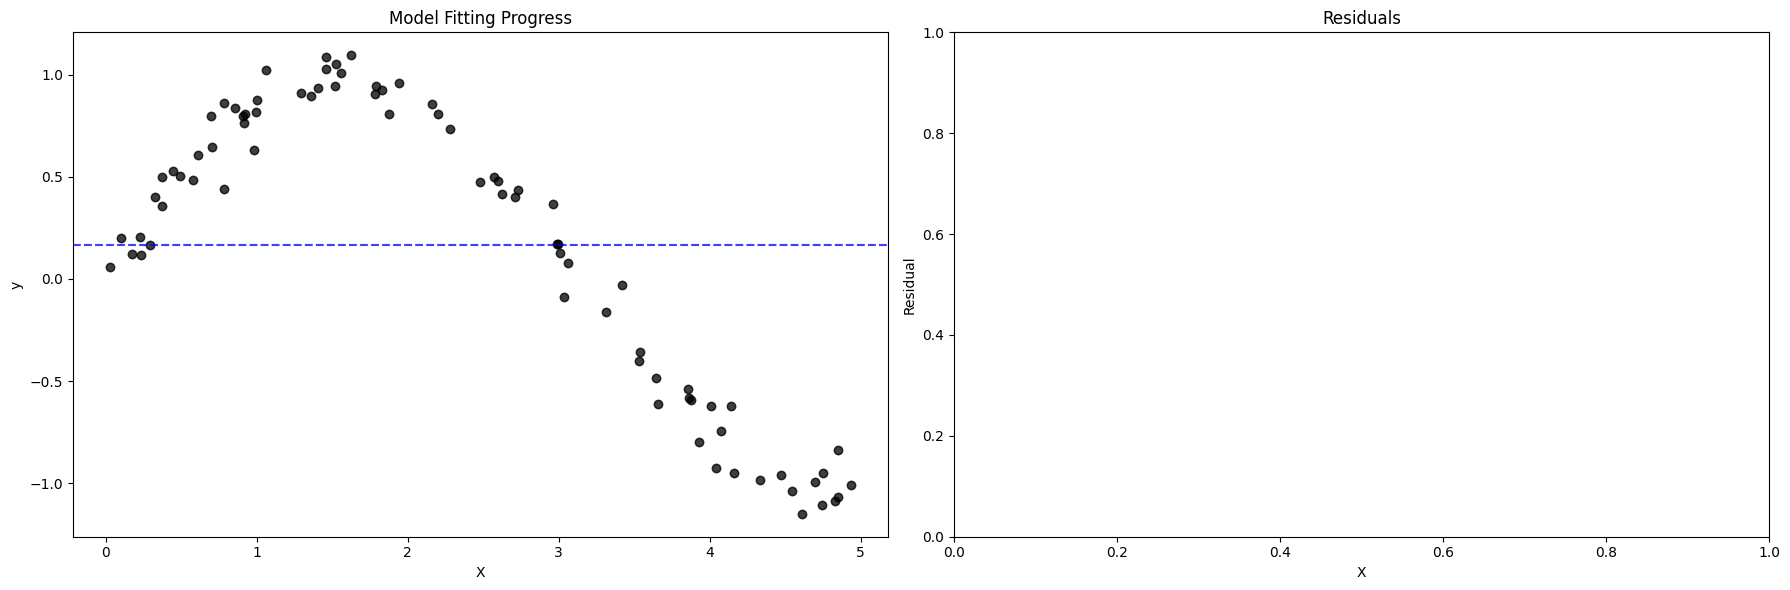

In [4]:
# Create and fit the model
visualizer = GradientBoostingVisualizer(X_1d, y_1d, n_estimators=10, learning_rate=0.1, max_depth=3)
visualizer.fit()

# Create the animation
animation = visualizer.visualize()

plt.show()

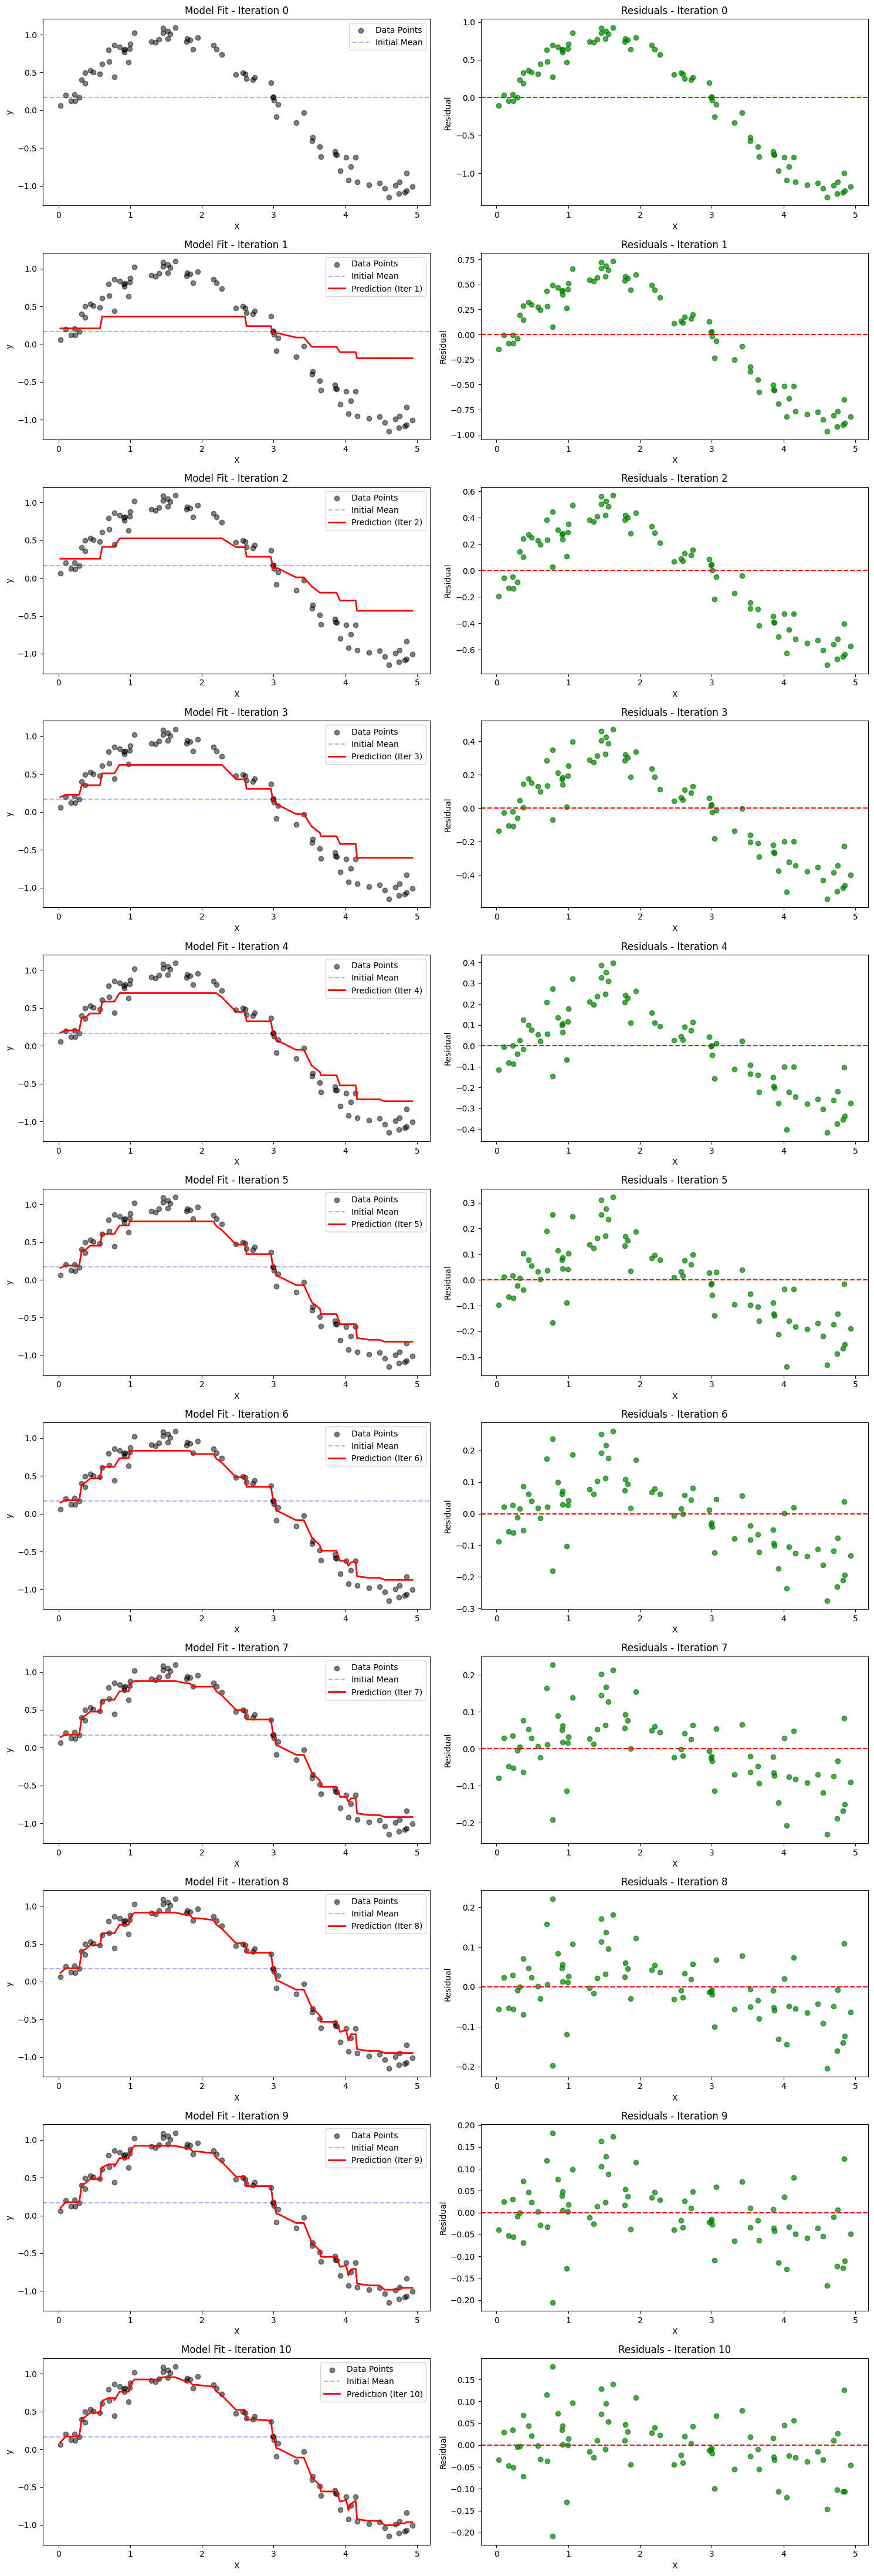

In [5]:
def demonstrate_single_iterations():
    visualizer = GradientBoostingVisualizer(X_1d, y_1d, n_estimators=10, learning_rate=0.3, max_depth=3)
    visualizer.fit()
    
    iterations_to_show = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    fig, axs = plt.subplots(len(iterations_to_show), 2, figsize=(15, 4*len(iterations_to_show)))
    
    sort_idx = np.argsort(visualizer.X)
    X_sorted = visualizer.X[sort_idx]
    y_sorted = visualizer.y[sort_idx]
    
    for i, iteration in enumerate(iterations_to_show):
        # Plot model predictions
        axs[i, 0].scatter(visualizer.X, visualizer.y, color='black', alpha=0.5, label='Data Points')
        axs[i, 0].axhline(y=visualizer.initial_prediction, color='blue', linestyle='--', alpha=0.3, label='Initial Mean')
        
        if iteration > 0:
            current_pred_sorted = visualizer.prediction_history[iteration][sort_idx]
            axs[i, 0].plot(X_sorted, current_pred_sorted, color='red', linewidth=2, 
                          label=f'Prediction (Iter {iteration})')
        
        axs[i, 0].set_title(f'Model Fit - Iteration {iteration}')
        axs[i, 0].set_xlabel('X')
        axs[i, 0].set_ylabel('y')
        axs[i, 0].legend()
        
        # Plot residuals
        if iteration < len(visualizer.residuals_history):
            residuals_sorted = visualizer.residuals_history[iteration][sort_idx]
            axs[i, 1].scatter(X_sorted, residuals_sorted, color='green', alpha=0.7)
            axs[i, 1].axhline(y=0, color='red', linestyle='--')
            axs[i, 1].set_title(f'Residuals - Iteration {iteration}')
            axs[i, 1].set_xlabel('X')
            axs[i, 1].set_ylabel('Residual')
    
    plt.tight_layout()
    plt.show()

demonstrate_single_iterations()